In [2]:
import functools

list_of_indices = [[1, 2, 3], [0, 4, 5], [2,3,4]]
indices = functools.reduce(lambda a, b: a + b, list_of_indices)
print(indices)  # 输出 15，因为 1 + 2 + 3 + 4 + 5 = 15


[1, 2, 3, 0, 4, 5, 2, 3, 4]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def load_and_display_npy(file_path):
    # 读取 .npy 文件
    data = np.load(file_path, allow_pickle=True)
    
    # 打印数组内容
    print("数组内容:")
    count = 0
    for idx, item in enumerate(data):
        if idx % 3 == 0:
            print(len(item))
        count += len(item)
    
    print(count)
    print(data)
    
    # 打印数组形状和数据类型
    print("\n数组形状:", data.shape)
    print("数据类型:", data.dtype)
    
    # 如果数组是图像数据，进行可视化
    if data.ndim == 2 or data.ndim == 3:
        plt.imshow(data, cmap='gray')
        plt.title('Image from .npy file')
        plt.axis('off')
        plt.show()

# 使用示例
load_and_display_npy('/home/mwj/mycode2/PersonalizedFL/split/medmnist0.1/partion_non_iid_dirichlet_1.0_20.npy')


数组内容:
499
500
501
499
501
501
502
500
499
501
501
501
500
502
501
500
501
499
501
498
25220
[list([37, 45, 187, 188, 201, 596, 945, 1023, 1113, 1368, 1405, 1662, 1852, 1959, 2032, 2141, 2198, 2463, 2475, 2646, 2666, 2780, 2871, 3008, 3059, 3075, 3699, 3796, 3875, 3976, 4316, 4328, 4391, 4414, 4726, 4736, 4766, 5096, 5120, 5551, 5834, 5883, 5962, 6207, 6463, 6474, 6538, 6607, 6987, 7042, 7268, 7435, 7542, 7747, 8201, 8263, 8305, 8378, 8440, 8456, 8513, 8598, 8652, 8856, 8919, 9151, 9157, 9237, 9285, 9331, 9488, 9521, 11, 389, 976, 1091, 1255, 1300, 1462, 1520, 1968, 2132, 2697, 2915, 2958, 3291, 4120, 4461, 5431, 5596, 5631, 6011, 6182, 6246, 6252, 6337, 6409, 6775, 7049, 7081, 7355, 7932, 8102, 8161, 8419, 8866, 8940, 8958, 9103, 9624, 9679, 9692, 551, 6565, 7816, 10516, 10544, 12551, 88, 2205, 3719, 5382, 6540, 34, 510, 511, 891, 993, 1246, 1475, 1749, 2124, 2416, 2784, 2935, 3039, 3091, 3171, 3215, 3294, 3496, 3568, 4029, 4066, 4203, 4251, 4556, 4599, 4649, 4809, 5065, 5090, 5417, 54

In [4]:
import torch
import numpy as np
# 读取保存的字典
checkpoint = torch.load('/home/mwj/mycode2/PersonalizedFL/cks/fed_medmnist_fedlp_0.1_0.01_0.001_0.5_1_1.0_0.6_300_1_0.001/fedlp')

# 访问字典中的内容
print('best_epoch:', checkpoint['best_epoch'])
print('best_vacc:', checkpoint['best_vacc'])
print('best_vacc:', np.mean(np.array(checkpoint['best_vacc'])))

print('best_tacc:', checkpoint['best_tacc'])
print('best_tacc:', np.mean(np.array(checkpoint['best_tacc'])))



best_epoch: 0
best_vacc: [0.6449086161879896, 0.412987012987013, 0.6805194805194805, 0.27486910994764396, 0.2552083333333333, 0.6536458333333334, 0.6614583333333334, 0.375, 0.4857142857142857, 0.3142857142857143, 0.6328125, 0.27676240208877284, 0.5234375, 0.4831168831168831, 0.6701298701298701, 0.21409921671018275, 0.3133159268929504, 0.6493506493506493, 0.6424870466321243, 0.2558746736292428]
best_vacc: 0.4709991694096402
best_tacc: [0.75, 0.42933333333333334, 0.7013333333333334, 0.29521276595744683, 0.3271276595744681, 0.7446808510638298, 0.6986666666666667, 0.36533333333333334, 0.592, 0.3626666666666667, 0.6933333333333334, 0.2765957446808511, 0.6746666666666666, 0.5053475935828877, 0.712, 0.2632978723404255, 0.3351063829787234, 0.713903743315508, 0.7379679144385026, 0.2632978723404255]
best_tacc: 0.5220935866803201


来自FedCLIP: Fast Generalization and Personalization for CLIP in Federated Learning
![alt text](image.png)
仿照实现

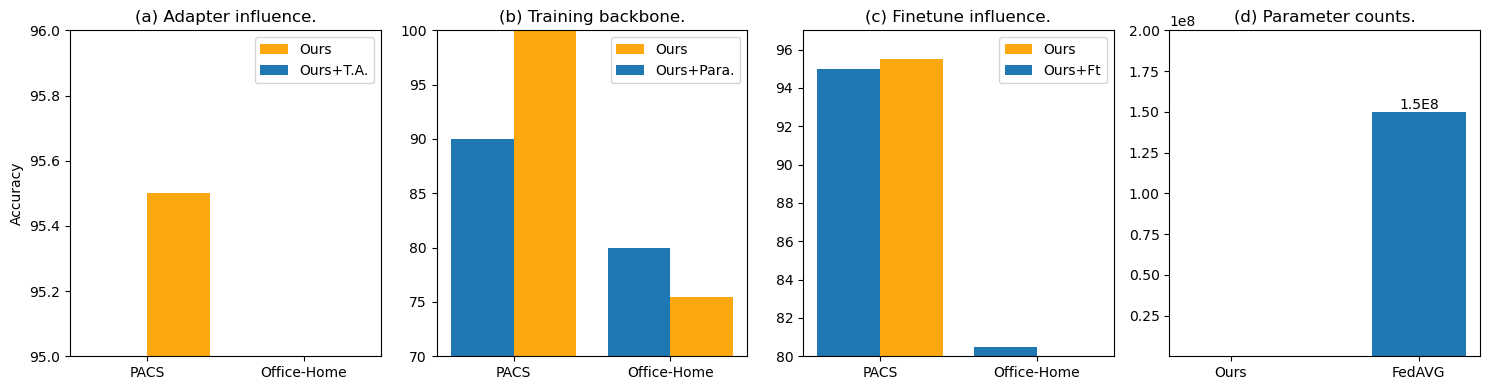

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
labels = ['PACS', 'Office-Home']

# Adapter Influence
ours_adapter = [95.5, 80.5]
ours_ta_adapter = [95.0, 82.0]

# Training Backbone
ours_backbone = [100.0, 75.5]
ours_para_backbone = [90.0, 80.0]

# Finetune Influence
ours_ft = [95.5, 80.0]
ours_ft_finetune = [95.0, 80.5]

# Parameter Counts
ours_param = 5.3e5  # Same value for "Ours"
fedavg_param = 1.5e8  # Same value for "FedAVG"

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

colors = ['#FFA70E', '#1F77B4']


# Subplot (a) Adapter influence
axs[0].bar(labels, ours_adapter, label='Ours', color=colors[0], width=0.4, align='edge')
axs[0].bar(labels, ours_ta_adapter, label='Ours+T.A.', color=colors[1], width=-0.4, align='edge')
axs[0].set_ylim(95, 96)
axs[0].set_ylabel('Accuracy')
axs[0].set_title('(a) Adapter influence.')
axs[0].legend()

# Subplot (b) Training backbone
axs[1].bar(labels, ours_backbone, label='Ours', color=colors[0], width=0.4, align='edge')
axs[1].bar(labels, ours_para_backbone, label='Ours+Para.', color=colors[1], width=-0.4, align='edge')
axs[1].set_ylim(70, 100)
axs[1].set_title('(b) Training backbone.')
axs[1].legend()

# Subplot (c) Finetune influence
axs[2].bar(labels, ours_ft, label='Ours', color=colors[0], width=0.4, align='edge')
axs[2].bar(labels, ours_ft_finetune, label='Ours+Ft', color=colors[1], width=-0.4, align='edge')
axs[2].set_ylim(80, 97)
axs[2].set_title('(c) Finetune influence.')
axs[2].legend()

# Subplot (d) Parameter counts
axs[3].bar(['Ours', 'FedAVG'], [ours_param, fedavg_param], color=colors, width=0.5)
axs[3].set_ylim(1e5, 2e8)
# axs[3].set_yticks([1e4, 5e7, 1e8, 1.5e8, 2e8])
axs[3].set_title('(d) Parameter counts.')
axs[3].text(1, 1.5e8, '1.5E8', ha='center', va='bottom', fontsize=10)

# Layout and display
plt.tight_layout()
plt.show()


In [1]:
import torch

x = torch.tensor([[3.0, 4.0], [1.0, 1.0]])
print(x)
x = x / x.norm(dim=1, keepdim=True)
print(x)

tensor([[3., 4.],
        [1., 1.]])
tensor([[0.6000, 0.8000],
        [0.7071, 0.7071]])
